In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = "whitegrid",font_scale=1.4)


In [2]:
data_path = os.path.join(os.path.expanduser('~'), 'Library/CloudStorage/Box-Box', 'COVID-19 Adolphs Lab','PreProcessed_Data')
selResp_path = os.path.join(os.path.expanduser('~'), 'Library/CloudStorage/Box-Box', 'COVID-19 Adolphs Lab','core_analysis','self_response')
out_dir = os.path.expanduser('~/Library/CloudStorage/Box-Box/COVID-19 Adolphs Lab/core_analysis/external_selfResp_combined')
fig_dir = os.path.expanduser('~/Library/CloudStorage/Box-Box/COVID-19 Adolphs Lab/core_analysis/figures')

data_file = 'Wave1-18_A-N_release.csv'
data = pd.read_csv(os.path.join(data_path, data_file), low_memory=False, na_values='NaN', dtype = str)
# include only full prlfc waves 
data = data.loc[data.wave.isin(['1', '2', '3', '4', '5', '6', '7', '8', '9',
                                '10', '11', '12', '13', '14', '15', '16', '17']), :]

# add week numbers for more accurate temproal representation of waves
wave_to_week = pd.read_csv(os.path.join(selResp_path, 'wave_to_week.csv'),dtype = str)
wave_dict = {wave_to_week.loc[i, 'wave']:wave_to_week.loc[i, 'wave_week'] for i in wave_to_week.index}
data['week'] = data['wave'].copy() 
data.week.replace(wave_dict, inplace = True)



# Demographics

In [3]:
data[['DemC8','DemC9','DemM6']] = data[['DemC8','DemC9','DemM6']].astype('float')
data['ethnicity'] = data['DemC8']
data['race'] = data['DemC9']
data['ethnicity'] = data['ethnicity'].replace({1: 'Hispanic or Latino', 2: 'Not Hispanic or Latino',3:' Prefer not to disclose'})
data['race'] = data['race'].replace({1:'American Indian/Alaska Native', 2:'Asian', 3:'Native Hawaiian or Other Pacific Islander',
                                          4: 'Black or African American', 5: 'White', 6: 'Multiracial', 7:'Other', 8: 'Prefer not to disclose'})
data['polit_party'] = data['DemM6']
data['polit_party'] = data['polit_party'].replace({1:'Republican', 2: 'Democrat', 3: 'Independent',  4: 'Other'})
data['sex'] = data['prlfc_dem_sex'].copy()


In [4]:
# unify weekly income

In [5]:
data[["DemW18_R1","DemW18_R2","DemW18.2"]] = data[["DemW18_R1","DemW18_R2","DemW18.2"]].astype(float)

DemW18_R1_dict =  {1: "<$250", 
                   2: "$250 - $499",
                   3: "$500 - $999", 
                   4: "$1000 -$1499", 
                   5: "$1500 - $2999", 
                   6: ">$3000", 
                   7: "Don't know"}

data["DemW18_R1"] = data["DemW18_R1"].replace(DemW18_R1_dict)

                   
DemW18_R2_dict =  {1: "<$250", 
                   2: "<$250", 
                   3: "<$250", 
                   4: "$250 - $499",
                   5: "$500 - $999", 
                   6: "$1000 -$1499", 
                   7: "$1500 - $2999", 
                   8: ">$3000", 
                   9: "Don't know"}          
data["DemW18_R2"] = data["DemW18_R2"].replace(DemW18_R2_dict)

                   
DemW18_2_dict  =  {1: "<$250", 
                   2: "<$250", 
                   3: "<$250", 
                   4: "$250 - $499",
                   5: "$500 - $999", 
                   6: "$1000 -$1499", 
                   7: "$1500 - $2999", 
                   8: ">$3000", 
                   9: "Don't know"}             
data["DemW18.2"] = data["DemW18.2"].replace(DemW18_2_dict)

data.loc[data.wave == '1', "weekly_income_self"] = data.loc[data.wave == '1', "DemW18_R1"] 
data.loc[data.wave.isin(['2', 
                         '3', 
                         '4',
                         '5', 
                         '6']), "weekly_income_self"] = data.loc[data.wave.isin(['2', 
                                                                                 '3', 
                                                                                 '4',
                                                                                 '5', 
                                                                                 '6']),"DemW18_R2"] 
data.loc[data.wave.isin(['7', 
                         '8', 
                         '9',
                         '10', 
                         '11',
                         '12',
                         '13',
                         '14',
                         '15',
                         '16',
                         '17']), "weekly_income_self"] = data.loc[data.wave.isin(['7', 
                                                                                  '8', 
                                                                                  '9',
                                                                                  '10',
                                                                                  '11',
                                                                                  '12',
                                                                                  '13',
                                                                                  '14',
                                                                                  '15',
                                                                                  '16',
                                                                                  '17']),"DemW18.2"]


data['weekly_income_self_cat'] = data.weekly_income_self.copy()
income_cat_dict = {"<$250":0,  
                   "$250 - $499":0.5,
                   "$500 - $999":1, 
                   "$1000 -$1499":2, 
                   "$1500 - $2999":3, 
                   ">$3000":4, 
                   "Don't know":np.nan}
data['weekly_income_self_cat_num'] = data['weekly_income_self_cat'].replace(income_cat_dict)
data

,V1,V2,V3,V4,V5,PROLIFIC_PID,TASK1,TASK2,TASK3,TASK4,...,perc_valid_failed,N_valid_failed,week,ethnicity,race,polit_party,sex,weekly_income_self,weekly_income_self_cat,weekly_income_self_cat_num
0,R_2ROqxMOS20VJuQI,Default Response Set,4/5/20 10:40,4/5/20 11:24,1,5df82e8739bcde5dd044f741,cvd_pgg,pro_iat,cvd_amp,tr_1s,...,0.2727272727272727,3.0,1,Not Hispanic or Latino,White,Other,Male,<$250,<$250,0.0
1,R_3qPaGJOZNgMHEYz,Default Response Set,4/5/20 10:51,4/5/20 11:41,1,5c7e91c1973c990016ea72b0,cvd_amp,cvd_pgg,pro_iat,tr_1s,...,0.0,0.0,1,Not Hispanic or Latino,White,Democrat,Female,$500 - $999,$500 - $999,1.0
2,R_3GjGPWLHGDG7lkE,Default Response Set,4/5/20 10:52,4/5/20 11:49,1,5e753094e8a6f10a9805ed9a,cvd_pgg,tr_1s,cvd_amp,pro_iat,...,0.0,0.0,1,Not Hispanic or Latino,White,Independent,Female,$500 - $999,$500 - $999,1.0
3,R_3eaj9TJfmhq1FLs,Default Response Set,4/5/20 10:49,4/5/20 11:53,1,5e67052c757e6149c38ce468,cvd_amp,pro_iat,tr_1s,cvd_pgg,...,0.0,0.0,1,Hispanic or Latino,Other,Democrat,Male,<$250,<$250,0.0
4,R_2Yh84GpehIS1WFU,Default Response Set,4/5/20 10:56,4/5/20 11:55,1,5e7745990fd39b2a816ec341,cvd_amp,cvd_pgg,tr_1s,pro_iat,...,0.1818181818181818,2.0,1,Not Hispanic or Latino,Black or African American,Democrat,Male,$250 - $499,$250 - $499,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20665,R_3KHG2KzAXt10mys,NaN,7/26/21 14:16,7/26/21 15:08,1,5e7e89cc4fd114104a39fb88,biat/index,cvd_consp/index,0,0,...,0.0,0.0,69,Not Hispanic or Latino,White,NaN,Female,$1500 - $2999,$1500 - $2999,3.0
20666,R_2aRVOk0ZByuduBn,NaN,7/26/21 6:05,7/26/21 7:08,1,5e83bb0601aa8c11929fa6d4,biat/index,cvd_consp/index,0,0,...,0.0,0.0,69,Hispanic or Latino,White,NaN,Female,$1000 -$1499,$1000 -$1499,2.0
20667,R_3fuQweG2CEvu34X,NaN,7/26/21 5:51,7/26/21 7:11,1,5e8421d0df483e18852ff25e,biat/index,cvd_consp/index,0,0,...,0.0,0.0,69,Not Hispanic or Latino,Multiracial,NaN,Female,<$250,<$250,0.0
20668,R_RXfYCjqyYFrLTah,NaN,7/25/21 16:02,7/25/21 17:01,1,5e84b8443f064006f1b5215c,biat/index,cvd_consp/index,0,0,...,0.0,0.0,69,Not Hispanic or Latino,Black or African American,NaN,Male,$500 - $999,$500 - $999,1.0


# SAFETY MEASURES ADOPTED

In [6]:
# NOT COLLECTED IN W18
safety_measures = []
for idx in range(1,10):
    safety_measures.append('RW22_' + str(idx))
# additional self-restriction questions    
    
# questions scored as 1 or NaN --> re-lable NaN as 0 if question was included in wave
for w in data.wave.unique():
    for col in safety_measures:
        if ~data.loc[data.wave == w, col].isnull().all():
            data.loc[data.wave == w, col] = data.loc[data.wave == w, col].fillna(0)
            
data['safety_measures'] = data[safety_measures].astype(float).mean(axis = 1)


# Personal CVD Concerns

In [7]:
cvd_concerns = []
for idx in range(9,13):
    cvd_concerns.append('RW' + str(idx)) 
data['cvd_concern'] = data[cvd_concerns].astype(float).mean(axis = 1)


# CVD Norm

In [8]:
cvd_norm = [] 
for idx in range(2,5): 
    cvd_norm.append('norm' + str(idx)) 
data['cvd_norm_agreement'] = data[cvd_norm].astype(float).mean(axis = 1) 


# Restriction importance

In [9]:
# 3 factors: factor items and loadings
factor1_dict = {"RW26_1": 0.664, # Restricting gatherings to fewer than 10 people
                "RW26_2": 0.536, #Closing schools
                "RW26_3":0.756, #Closing restaurants / bars
                "RW26_17":0.790, #Restricting gatherings to fewer than 5 people
                "RW26_18":0.727, #Restricting gatherings to no more than 2 people
                "RW26_10":0.654, #Cancelling church services and other meetings
                "RW26_11":0.757, #Staying home, except to fulfill essential needs, like buying food and medicine.
                "RW26_12":0.857, #Closing non-essential businesses
                "RW26_13":0.808, #Closing parks and other public outdoor places
                "RW26_14":0.597} #Wearing masks when in public

factor2_dict = {"RW26_15":1.009,  #Restricting gatherings to fewer than 250 people
                "RW26_16":0.925} #Restricting gatherings to fewer than 50 people

factor3_dict = {"RW26_4": 0.676, #Avoiding contact with people who are sick
                "RW26_5":0.698, #Staying home when you are sick (except to get medical care)
                "RW26_6": 0.783, #Covering coughs and sneezes
                "RW26_7":0.534} #Washing hands often

# flip responses: original = 1 = Necessary; 2 = Not necessary, but probably helpful; 3 = Probably not helpful; 4 = A major over-reaction 
# flip so that 1 --> low importance and 4 --> high importance
cols = list(factor1_dict.keys()) + list(factor2_dict.keys()) + list(factor3_dict.keys())
factors = data[['week','wave','PROLIFIC_PID']].copy()
factors.week = factors.week.astype(int)
factors.wave = factors.wave.astype(int)
factors[cols] = 5 - data[cols].astype(float) 

# factor 1
for fItem in factor1_dict.keys():
    factors[fItem] = factors[fItem]*factor1_dict[fItem]
data['restrict_f1'] = factors[factor1_dict.keys()].mean(axis=1)

# factor 2
for fItem in factor2_dict.keys():
    factors[fItem] = factors[fItem]*factor2_dict[fItem]    
data['restrict_f2'] = factors[factor2_dict.keys()].mean(axis=1)

# factor 3
for fItem in factor3_dict.keys():
    factors[fItem] = factors[fItem]*factor3_dict[fItem] 
data['restrict_f3'] = factors[factor3_dict.keys()].mean(axis=1)


# init summary scores

In [10]:
attitude_measures = ['cvd_concern', 'cvd_norm_agreement','restrict_f1', 'restrict_f2', 'restrict_f3']
impact_measures  = ['weekly_income_self_cat_num','safety_measures',
                    'parent_health_impact',  
                    'grandparent_health_impact',
                    'thirdDegree_health_impact', 
                    'child_health_impact', 
                    'friend_health_impact',
                    'work_colleague_health_impact',
                    'sibling_health_impact']

summary_scores = data[['week','wave','PROLIFIC_PID', 
                      'ethnicity', 'race','polit_party', 'sex','agecats',
                       'weekly_income_self_cat','weekly_income_self_cat_num',
                      'safety_measures', 'cvd_concern', 'cvd_norm_agreement',
                      'restrict_f1', 'restrict_f2', 'restrict_f3']].copy()
summary_scores.week = summary_scores.week.astype(int)
summary_scores.wave = summary_scores.wave.astype(int)
summary_scores = summary_scores.sort_values(['PROLIFIC_PID', 'wave'])
summary_scores['polit_party'] = summary_scores['polit_party'].ffill()
summary_scores['ethnicity'] = summary_scores['ethnicity'].ffill()
summary_scores['race'] = summary_scores['race'].ffill()
summary_scores['sex'] = summary_scores['sex'].ffill()
summary_scores['agecats'] = summary_scores['agecats'].ffill()
summary_scores = summary_scores.loc[summary_scores[['ethnicity','race','polit_party','sex','agecats','weekly_income_self_cat']].notna().sum(axis=1)>5, :]


In [11]:
pid_attitude_corr = pd.DataFrame(columns = ['pid', 'index_var']+attitude_measures)
for pid in summary_scores.PROLIFIC_PID.unique():
    if summary_scores.loc[summary_scores.PROLIFIC_PID==pid].shape[0]>2:
        tmp_df = summary_scores.loc[summary_scores.PROLIFIC_PID==pid, attitude_measures].corr().reset_index()
        tmp_df  = tmp_df.rename(columns = {'index': 'index_var'})
        tmp_df['pid'] = pid
        pid_attitude_corr = pd.concat([pid_attitude_corr, tmp_df])

attitude_corr = pid_attitude_corr.groupby(by='index_var').mean(numeric_only = True)
    

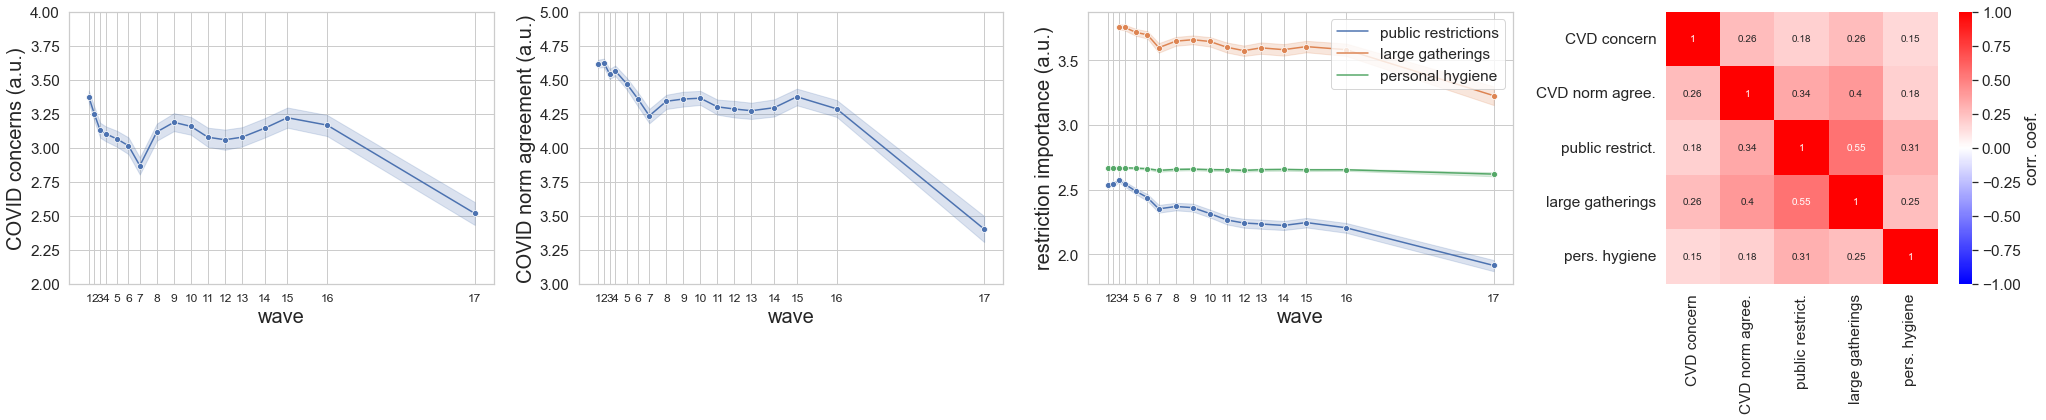

In [22]:
fig, axs = plt.subplots(1,4, figsize = (35,5))

    
sns.lineplot(data = summary_scores, x = 'week', y ='cvd_concern', marker = 'o',  ax = axs[0]) 
axs[0].set_xticks(summary_scores.week.unique())
axs[0].set_xticklabels(summary_scores.wave.unique())
axs[0].set_xticks(summary_scores.week.unique())
axs[0].set_xticklabels(summary_scores.wave.unique())
axs[0].set_xlabel('wave')
axs[0].set_ylim([2,4])
axs[0].set_ylabel('COVID concerns (a.u.)')
axs[0].tick_params(axis='x', labelsize=12)
axs[0].yaxis.label.set_size(20)
axs[0].xaxis.label.set_size(20)

sns.lineplot(data = summary_scores, x = 'week', y = 'cvd_norm_agreement', marker = 'o', ax = axs[1]) 
axs[1].set_xticks(summary_scores.week.unique()); 
axs[1].set_xticklabels(summary_scores.wave.unique()); 
axs[1].set_xticks(summary_scores.week.unique()); 
axs[1].set_xticklabels(summary_scores.wave.unique()); 
axs[1].set_xlabel('wave'); 
axs[1].set_ylim([3,5]); 
axs[1].set_ylabel('COVID norm agreement (a.u.)'); 
axs[1].tick_params(axis='x', labelsize=12)
axs[1].yaxis.label.set_size(20)
axs[1].xaxis.label.set_size(20)

tmp_data = summary_scores[['PROLIFIC_PID','week','wave','restrict_f1', 'restrict_f2', 'restrict_f3']].melt(id_vars=['PROLIFIC_PID', 'week', 'wave'], value_vars=['restrict_f1', 'restrict_f2', 'restrict_f3'])
sns.lineplot(data = tmp_data, x = 'week', y = 'value', hue = 'variable', marker = 'o', ax = axs[2]) 
axs[2].set_xticks(summary_scores.week.unique()); 
axs[2].set_xticklabels(summary_scores.wave.unique()); 
axs[2].set_xticks(summary_scores.week.unique()); 
axs[2].set_xticklabels(summary_scores.wave.unique()); 
axs[2].set_xlabel('wave'); 
axs[2].set_ylabel('restriction importance (a.u.)'); 
handles, labels = axs[2].get_legend_handles_labels()
axs[2].legend(handles=handles[0:], labels = ['public restrictions', 'large gatherings', 'personal hygiene'])
axs[2].tick_params(axis='x', labelsize=12)
axs[2].yaxis.label.set_size(20)
axs[2].xaxis.label.set_size(20)
attitude_corr = attitude_corr.round(2)
  
sns.heatmap(attitude_corr, cmap='bwr',annot=True, vmin = -1, vmax = 1, ax= axs[3],cbar_kws={'label': 'corr. coef.'})
axs[3].set_box_aspect(1)
axs[3].set_xticklabels(['CVD concern', 'CVD norm agree.', 'public restrict.', 'large gatherings', 'pers. hygiene'])
axs[3].set_ylabel('')
axs[3].set_yticklabels(['CVD concern', 'CVD norm agree.', 'public restrict.', 'large gatherings', 'pers. hygiene'])


img_format = 'svg'
fig.savefig(os.path.join(fig_dir, 'timecourse_CVD_attitudes.' + img_format), format=img_format)
    

# SOCIAL NETWORK HEALTH IMPACT

In [13]:
def health_impact(col_nameV1,col_nameV2,  soc_cat, data, out_data):
    '''
    Health impact in the social network was assesed in two differnt variables (w1-8: RW21; w9-18: RW21v2)
    This function combines the two variabales and creates a summary score for the defined social category.
    @ Input:
    col_nameV1 (string): V1 data column, e.g. "RW21_1" --> spouse
    col_nameV2 (string): V2 data column, e.g. "RW21v2_1" --> spouse
    soc_cat (string): label for social category, e.g. "spouse_health_impact"
    data (df): all data dataframe
    out_data (df): summary output dataframe
    '''
    
    tmp_cols = []
    for idx in range(2,6):
        tmp_cols.append(col_nameV1 + '_' + str(idx))
        tmp_cols.append(col_nameV2 + '_' + str(idx))

    tmp_cols = ['PROLIFIC_PID', 'wave'] + tmp_cols
    tmp_data = data[tmp_cols].copy()  

    tmp_data_w1_8 = tmp_data.columns[(tmp_data.columns.str.startswith('RW21_')) & (~tmp_data.columns.str.endswith('1'))]
    tmp_data_w9_18 = tmp_data.columns[(tmp_data.columns.str.startswith('RW21v2_'))& (~tmp_data.columns.str.endswith('1'))]


    tmp_data = tmp_data.fillna(0)
    for idx, col in enumerate(tmp_data_w1_8):
         tmp_data.loc[tmp_data[col] == '1.0', col] = idx+1
    for idx, col in enumerate(tmp_data_w9_18):
         tmp_data.loc[tmp_data[col] == '1.0', col] = idx+1        
    out_data[soc_cat] = tmp_data.iloc[:,2:].max(axis=1)
    return out_data

summary_scores = health_impact('RW21_1' ,'RW21v2_1',  'spouse_health_impact', data, summary_scores)
summary_scores = health_impact('RW21_2' ,'RW21v2_2',  'parent_health_impact', data, summary_scores)
summary_scores = health_impact('RW21_3' ,'RW21v2_3',  'grandparent_health_impact', data, summary_scores)
summary_scores = health_impact('RW21_4' ,'RW21v2_4',  'thirdDegree_health_impact', data, summary_scores)
summary_scores = health_impact('RW21_5' ,'RW21v2_5',  'child_health_impact', data, summary_scores)
summary_scores = health_impact('RW21_6' ,'RW21v2_6',  'friend_health_impact', data, summary_scores)
summary_scores = health_impact('RW21_7' ,'RW21v2_7',  'work_colleague_health_impact', data, summary_scores)
summary_scores = health_impact('RW21_9' ,'RW21v2_9',  'sibling_health_impact', data, summary_scores)


tmp_data = summary_scores[['PROLIFIC_PID','week','wave',
                           'spouse_health_impact', 
                           'parent_health_impact', 
                           'grandparent_health_impact',
                           'thirdDegree_health_impact', 
                           'child_health_impact', 
                           'friend_health_impact',
                           'work_colleague_health_impact',
                           'sibling_health_impact']].melt(id_vars=['PROLIFIC_PID',
                                                                  'week', 
                                                                  'wave'], value_vars=['spouse_health_impact', 
                                                                                       'parent_health_impact',
                                                                                       'grandparent_health_impact',
                                                                                       'thirdDegree_health_impact', 
                                                                                       'child_health_impact', 
                                                                                       'friend_health_impact',
                                                                                       'work_colleague_health_impact',
                                                                                       'sibling_health_impact'])


In [14]:
summary_scores['max_social_health_impact']= summary_scores[['spouse_health_impact', 
                                                            'parent_health_impact', 
                                                            'grandparent_health_impact',
                                                            'thirdDegree_health_impact', 
                                                            'child_health_impact', 
                                                            'friend_health_impact',
                                                            'work_colleague_health_impact',
                                                            'sibling_health_impact']].max(axis = 1)

In [15]:
impact_measures

['weekly_income_self_cat_num',
 'safety_measures',
 'parent_health_impact',
 'grandparent_health_impact',
 'thirdDegree_health_impact',
 'child_health_impact',
 'friend_health_impact',
 'work_colleague_health_impact',
 'sibling_health_impact']

In [16]:
pid_impact_corr = pd.DataFrame(columns = ['pid', 'index_var']+impact_measures)
for pid in summary_scores.PROLIFIC_PID.unique():
    if summary_scores.loc[summary_scores.PROLIFIC_PID==pid].shape[0]>2:
        tmp_df = summary_scores.loc[summary_scores.PROLIFIC_PID==pid, impact_measures].corr().reset_index()
        tmp_df  = tmp_df.rename(columns = {'index': 'index_var'})
        tmp_df['pid'] = pid
        pid_impact_corr = pd.concat([pid_impact_corr, tmp_df])

impact_corr = pid_impact_corr.groupby(by='index_var').mean(numeric_only = True)
impact_corr = impact_corr.loc[impact_measures, impact_measures]

In [17]:
impact_corr

,weekly_income_self_cat_num,safety_measures,parent_health_impact,grandparent_health_impact,thirdDegree_health_impact,child_health_impact,friend_health_impact,work_colleague_health_impact,sibling_health_impact
index_var,,,,,,,,,
weekly_income_self_cat_num,1.000000,-0.029737,-0.010415,-0.005902,0.024751,0.058983,-0.002948,0.031230,-0.012320
safety_measures,-0.029737,1.000000,0.024103,0.065870,-0.042308,-0.102708,-0.057294,-0.071048,-0.031552
parent_health_impact,-0.010415,0.024103,1.000000,0.804893,0.461922,0.358670,0.124821,0.250240,0.516633
grandparent_health_impact,-0.005902,0.065870,0.804893,1.000000,0.390215,0.298688,0.051493,0.155905,0.286856
thirdDegree_health_impact,0.024751,-0.042308,0.461922,0.390215,1.000000,0.305372,0.240742,0.334340,0.354583
child_health_impact,0.058983,-0.102708,0.358670,0.298688,0.305372,1.000000,0.228391,0.222961,0.527319
friend_health_impact,-0.002948,-0.057294,0.124821,0.051493,0.240742,0.228391,1.000000,0.324217,0.280791
work_colleague_health_impact,0.031230,-0.071048,0.250240,0.155905,0.334340,0.222961,0.324217,1.000000,0.279888
sibling_health_impact,-0.012320,-0.031552,0.516633,0.286856,0.354583,0.527319,0.280791,0.279888,1.000000


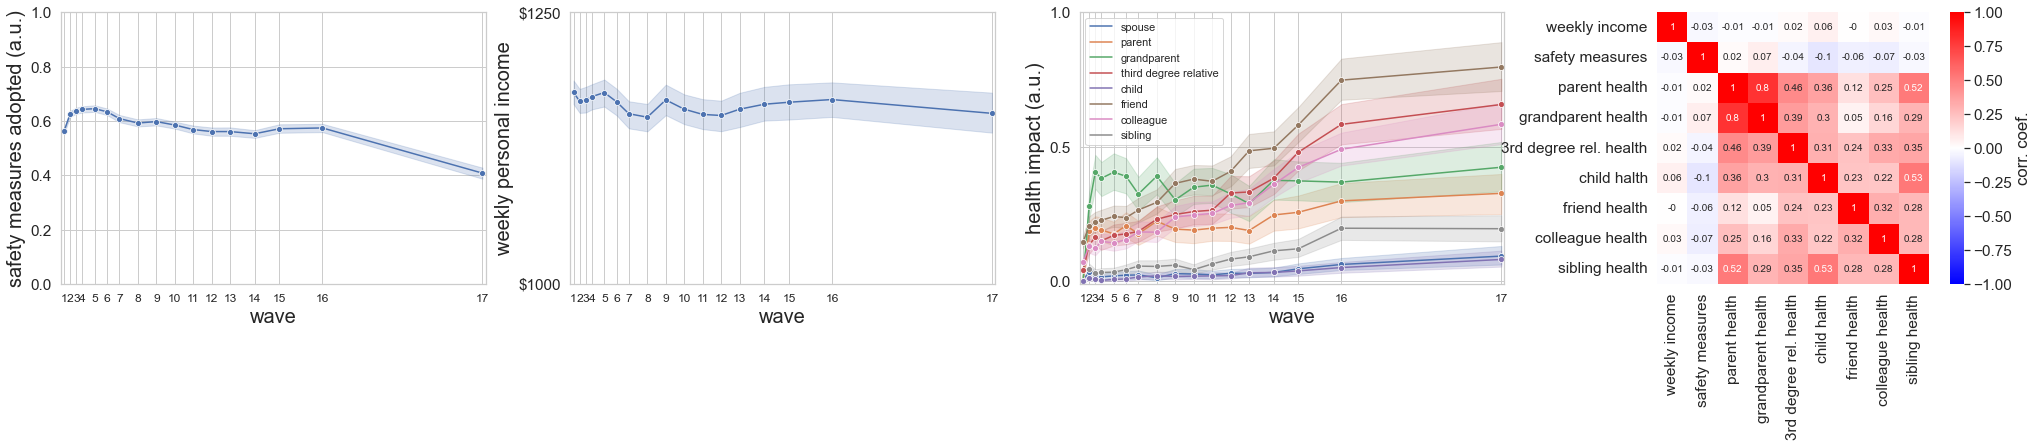

In [21]:
fig, axs = plt.subplots(1,4, figsize = (35,5))

tmp_data = summary_scores[['PROLIFIC_PID','week','wave',
                           'spouse_health_impact', 
                           'parent_health_impact', 
                           'grandparent_health_impact',
                           'thirdDegree_health_impact', 
                           'child_health_impact', 
                           'friend_health_impact',
                           'work_colleague_health_impact',
                            'sibling_health_impact']].melt(id_vars=['PROLIFIC_PID', 
                                                                  'week', 
                                                                  'wave'], value_vars=['spouse_health_impact', 
                                                                                       'parent_health_impact', 
                                                                                       'grandparent_health_impact',
                                                                                       'thirdDegree_health_impact', 
                                                                                       'child_health_impact', 
                                                                                       'friend_health_impact',
                                                                                       'work_colleague_health_impact',
                                                                                       'sibling_health_impact'])
# sibling variable was added in W2
tmp_data.loc[(tmp_data.wave==1)&(tmp_data.variable == 'sibling_health_impact'), 'value'] = np.nan   
   



sns.lineplot(data = summary_scores, x = 'week', y = 'safety_measures', marker = 'o', ax = axs[0])
axs[0].set_xticks(summary_scores.week.unique());
axs[0].set_xticklabels(summary_scores.wave.unique());
axs[0].set_xticks(summary_scores.week.unique());
axs[0].set_xticklabels(summary_scores.wave.unique());
axs[0].set_xlabel('wave')
axs[0].set_xlim([0.5,69.5])
axs[0].set_ylabel('safety measures adopted (a.u.)');
axs[0].set_ylim([0,1])
axs[0].tick_params(axis='x', labelsize=12)
axs[0].yaxis.label.set_size(20)
axs[0].xaxis.label.set_size(20)


sns.lineplot(data = summary_scores, x = 'week', y = 'weekly_income_self_cat', marker = 'o', ax = axs[1])
axs[1].set_xticks(summary_scores.week.unique());
axs[1].set_xticklabels(summary_scores.wave.unique());
axs[1].set_xticks(summary_scores.week.unique());
axs[1].set_xticklabels(summary_scores.wave.unique());
axs[1].set_xlabel('wave')
axs[1].set_xlim([0.5,69.5])
axs[1].set_ylabel('weekly personal income');
axs[1].set_ylim(1,2.5)
# axs[1].set_yticks([0,0.5,1,2.5]);
# axs[1].set_yticklabels(['$250', '$500', '$1000', '$1250'])
axs[1].set_yticks([1,2.5]);
axs[1].set_yticklabels(['$1000', '$1250'])
axs[1].tick_params(axis='x', labelsize=12)
axs[1].yaxis.label.set_size(20)
axs[1].xaxis.label.set_size(20)

sns.lineplot(data = tmp_data, x ='week',  y = 'value', hue = 'variable', marker = 'o', ax = axs[2])
axs[2].set_xticks(summary_scores.week.unique());
axs[2].set_xticklabels(summary_scores.wave.unique());
axs[2].set_xlabel('wave')
axs[2].set_xlim([0.5,69.5])
axs[2].set_ylim([-0.01,1])
axs[2].set_ylabel('health impact (a.u.)')
axs[2].set_yticks([0, 0.5, 1]);
handles, labels = axs[2].get_legend_handles_labels()
labels = ['spouse', 'parent', 'grandparent', 'third degree relative', 'child', 'friend','colleague', 'sibling']
axs[2].legend(handles, labels, fontsize = 11)
axs[2].tick_params(axis='x', labelsize=12)
axs[2].yaxis.label.set_size(20)
axs[2].xaxis.label.set_size(20)
impact_corr = impact_corr.round(2)
sns.heatmap(impact_corr, cmap='bwr',annot=True, vmin = -1, vmax = 1, ax= axs[3],cbar_kws={'label': 'corr. coef.'})
axs[3].set_box_aspect(1)
axs[3].set_xticklabels(['weekly income', 'safety measures', 
                        'parent health', 'grandparent health', '3rd degree rel. health',
                       'child halth', 'friend health', 'colleague health', 'sibling health' ])
axs[3].set_ylabel('')
axs[3].set_yticklabels(['weekly income', 'safety measures', 
                        'parent health', 'grandparent health', '3rd degree rel. health',
                       'child halth', 'friend health',  'colleague health', 'sibling health' ])



img_format = 'svg'
fig.savefig(os.path.join(fig_dir, 'timecourse_CVD_impact.' + img_format), format=img_format)
    

In [19]:
# save summary scores
summary_scores.to_csv(os.path.join(out_dir, 'CVD_core_summary_scores.csv'), index = False)